# E-Mail Spam Classifier

Importing all required libraries

In [35]:
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import numpy
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import spacy
from sklearn.preprocessing import MinMaxScaler

creating our dataframe

In [26]:
data=pd.read_csv("spam.csv", encoding="ISO-8859-1")

df=pd.DataFrame(data)
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


creating our target column

In [27]:
df["spam"]=df["v1"].apply(lambda x: 1 if x=="spam" else 0)
df.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"], inplace=True)
df

,v1,v2,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1
5568,ham,Will Ì_ b going to esplanade fr home?,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0
5570,ham,The guy did some bitching but I acted like i'd...,0


In [28]:
nlp=spacy.load("en_core_web_lg")

In [29]:
df["vector"]=df["v2"].apply(lambda x: nlp(x).vector)
df

,v1,v2,spam,vector
0,ham,"Go until jurong point, crazy.. Available only ...",0,"[0.022044934, 0.09757433, 0.002553665, -0.1926..."
1,ham,Ok lar... Joking wif u oni...,0,"[-0.07367852, -0.19237824, -0.1709596, -0.4884..."
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,"[0.012893126, -0.0072731962, -0.006278193, 0.0..."
3,ham,U dun say so early hor... U c already then say...,0,"[-0.11613209, 0.17318583, -0.20066053, -0.3331..."
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,"[0.0507494, 0.26546127, -0.2296746, -0.1811316..."
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1,"[-0.14301975, 0.26149178, -0.034142062, -0.029..."
5568,ham,Will Ì_ b going to esplanade fr home?,0,"[0.1618304, 0.0824183, -0.18377529, -0.1397431..."
5569,ham,"Pity, * was in mood for that. So...any other s...",0,"[-0.05494839, 0.19570266, -0.13729948, -0.1639..."
5570,ham,The guy did some bitching but I acted like i'd...,0,"[-0.06460267, 0.17402254, -0.21391848, -0.0767..."


Spliting data into test and train

In [30]:
X_train,X_test,y_train,y_test=train_test_split(df["vector"],df["spam"],test_size=0.3)

In [31]:
X_train_st= numpy.stack(X_train)
X_test_st= numpy.stack(X_test)

In [32]:
scaler= MinMaxScaler()
X_train_sc=scaler.fit_transform(X_train_st)
X_test_sc=scaler.transform(X_test_st)

In [33]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (3900,)
X_test shape: (1672,)


In [36]:
model= KNeighborsClassifier()
model.fit(X_train,y_train)

ValueError: setting an array element with a sequence.

converting text to digits

In [ ]:
cv=CountVectorizer()
X_train_cv=cv.fit_transform(X_train)

In [ ]:
X_test_cv=cv.transform(X_test)

choosing our model

In [ ]:
model= MultinomialNB()
model.fit(X_train_cv,y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [ ]:
model_prediction = model.predict(X_test_cv)

Our Model Report

In [ ]:
print(classification_report(y_test,model_prediction))
print("Model accuracy % = ",end="")
print(model.score(X_test_cv,y_test)*100)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1431
           1       0.98      0.95      0.96       241

    accuracy                           0.99      1672
   macro avg       0.99      0.97      0.98      1672
weighted avg       0.99      0.99      0.99      1672

Model accuracy % = 98.98325358851675


*testing our own texts*

In [ ]:
text= ["let us have free tea","let's go eat icecream brother"]
text_cv=cv.transform(text)
pred=model.predict(text_cv)
for i in range(len(pred)):
    if pred[i]==1:
        print("spam")
    else:
        print("not spam")

not spam
not spam


In [ ]:
conf=confusion_matrix(y_test,model_prediction)
conf

array([[1427,    4],
       [  13,  228]])

Creating visuals for comparision

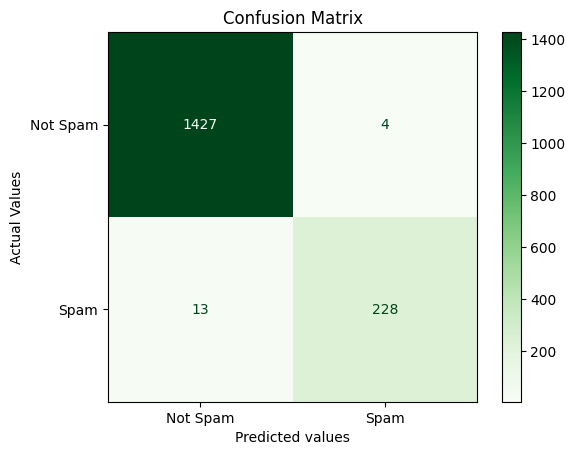

In [ ]:
matrix= ConfusionMatrixDisplay(confusion_matrix=conf , display_labels=["Not Spam","Spam"])
matrix.plot(cmap="Greens")
plt.title("Confusion Matrix")
plt.xlabel("Predicted values")
plt.ylabel("Actual Values")
plt.show()